# View the result of many simulations

In [3]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [6]:
dirs = os.listdir(path_data)

In [13]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [15]:
selected_files.sort()


In [17]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [19]:
all_data[0].shape

(912, 8)

In [20]:
sed_idx=0

In [21]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [23]:
df=pd.DataFrame(data)

In [30]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f28c3d68>]], dtype=object)

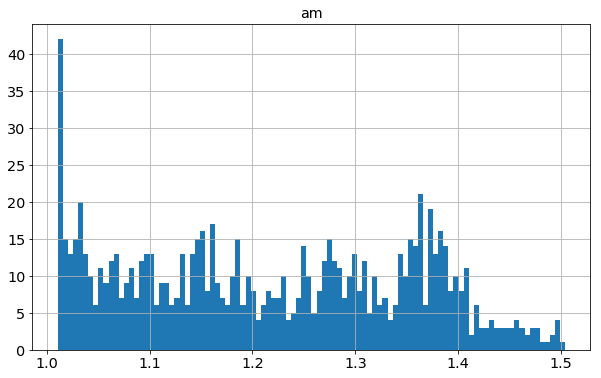

In [27]:
df.hist("am",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21eb00c668>]], dtype=object)

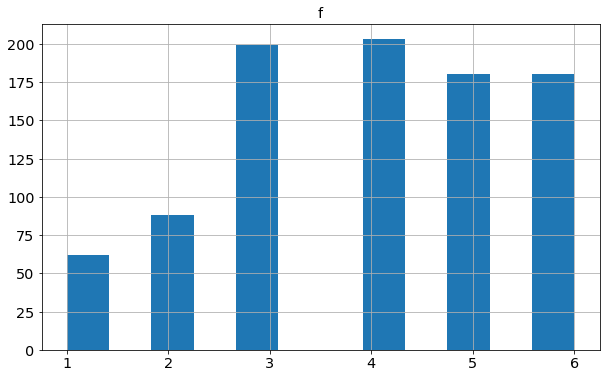

In [28]:
df.hist("f",bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21eb019da0>]], dtype=object)

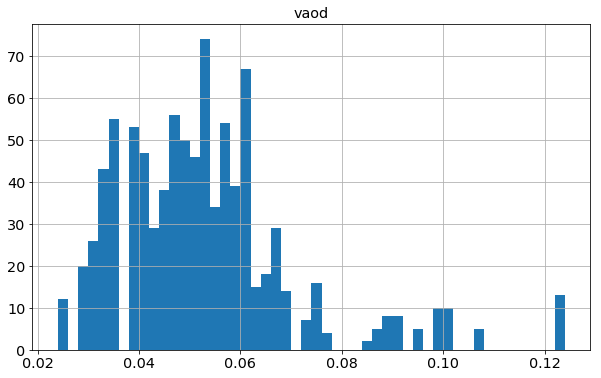

In [31]:
df.hist('vaod',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21e3920780>]], dtype=object)

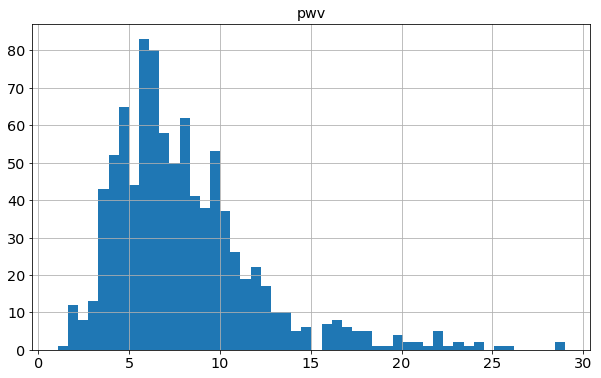

In [32]:
df.hist('pwv',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21e103ef98>]], dtype=object)

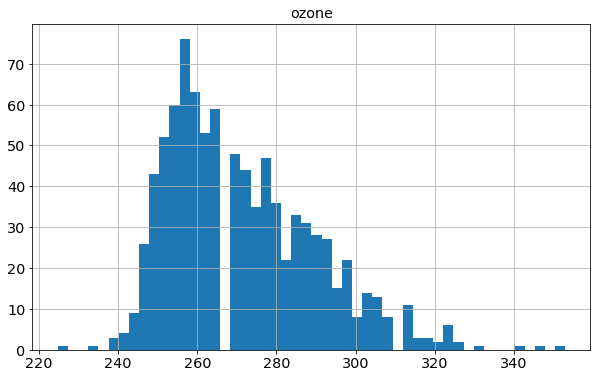

In [33]:
df.hist('ozone',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21dc867940>]], dtype=object)

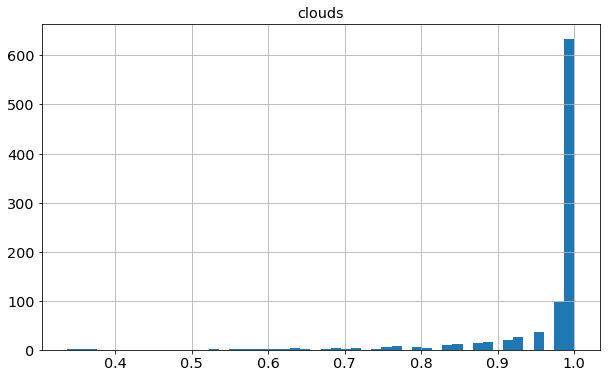

In [35]:
df.hist('clouds',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21b98100f0>]], dtype=object)

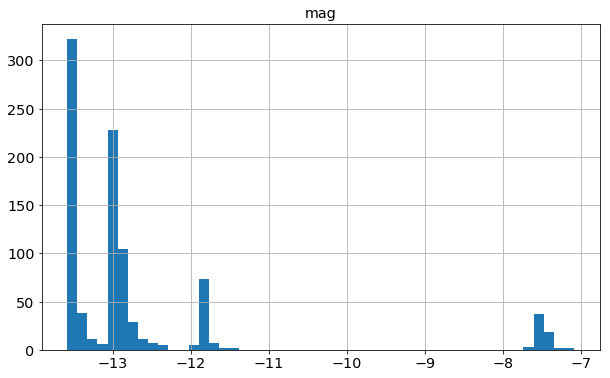

In [36]:
df.hist('mag',bins=50)

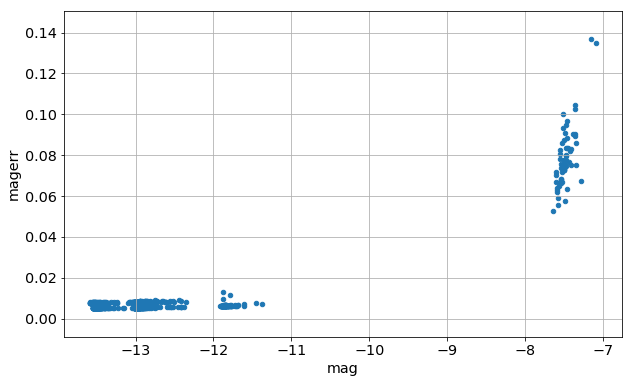

In [45]:
df.plot.scatter(x='mag',y='magerr',grid=True)

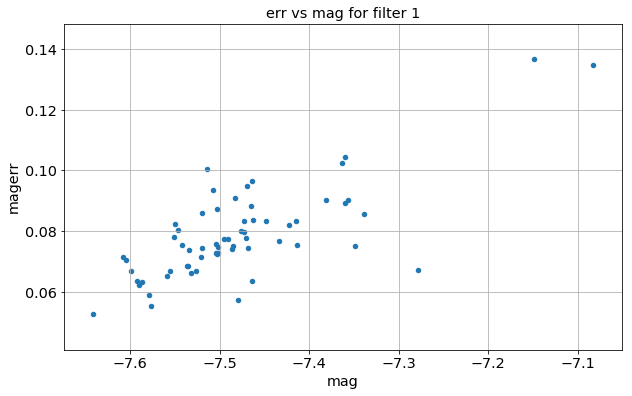

In [44]:
df.loc[(df.f == 1) & (df.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)